In [11]:
import utils
from config import config

import numpy as np
import os
import pickle
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline 

### Show Final Images

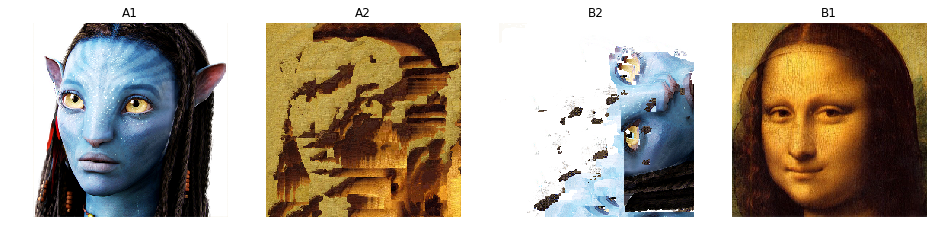

In [12]:
A1 = np.asarray(Image.open(os.path.join('Images', "avatar.png")).resize((config['img_size'],config['img_size'])))
B1 = np.asarray(Image.open(os.path.join('Images', "joconde.png")).resize((config['img_size'],config['img_size'])))

A2 = B1[NNFs_ab[1][:,:,0], NNFs_ab[1][:,:,1], :]
B2 = A1[NNFs_ba[1][:,:,0], NNFs_ba[1][:,:,1], :]

images = [A1, A2, B2, B1]
names = ['A1', 'A2', 'B2', 'B1']

# Displays the images
plt.figure(figsize=(16, 12))
for img, title, i in zip(images, names, list(range(4))):
    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.show()

### Show Feature Maps

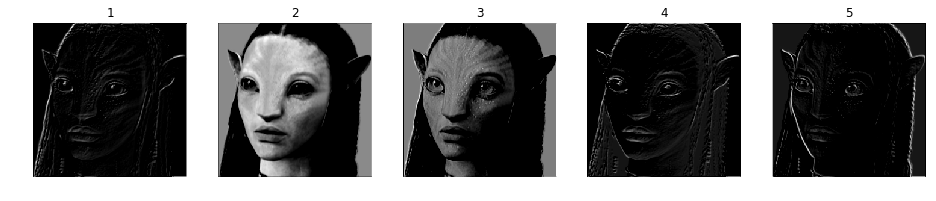

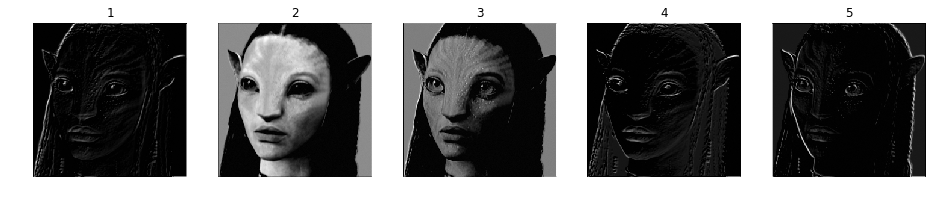

In [18]:
F_toLoad = [('A1',1), 
            ('A2',1),
           ]

# Displays the feature Maps
for (F_i, L_i) in F_toLoad:
    F = utils.loadFeatureMaps(os.path.join('featureMaps_' + F_i + '.pkl'))

    plt.figure(figsize=(16, 12))
    for f in range(5):
        plt.subplot(1,5,f+1)
        plt.imshow(F[L_i][:,:,f], cmap='gray')
        plt.title(str(f+1))
        plt.axis("off")
    plt.show()

### Show NNFs

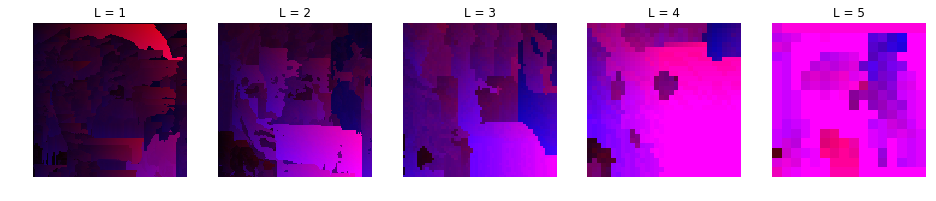

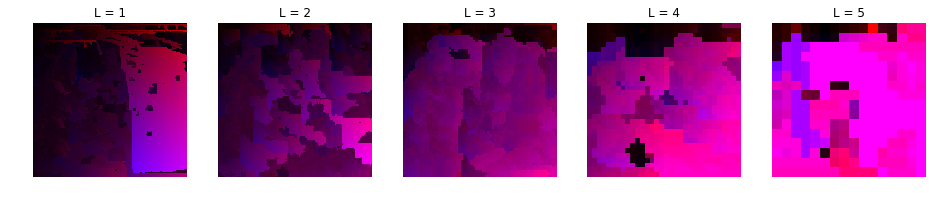

In [19]:
# Displays the NNF (mapping function)
NNFs_ab = utils.loadFeatureMaps(os.path.join('NNFs_ab.pkl'))
NNFs_ba = utils.loadFeatureMaps(os.path.join('NNFs_ba.pkl'))
All_NNFs = [NNFs_ab, NNFs_ba]

for NNFs in All_NNFs:

    plt.figure(figsize=(16, 12))
    for L in range(1,6):
        
        # Concatenate to RGB where G=zeros
        zeros = np.zeros(shape=(NNFs[L].shape[0], NNFs[L].shape[1], 1), dtype=NNFs[L].dtype)
        colorNNF = np.concatenate((np.expand_dims(NNFs[L][:,:,0], 2), zeros, np.expand_dims(NNFs[L][:,:,1], 2)), axis=2)
        colorNNF = (colorNNF / float(np.max(colorNNF))) * 255

        # Displays the NNFs for every layer L
        plt.subplot(1,5,L)
        plt.imshow(colorNNF.astype(np.uint8))
        plt.title("L = " + str(L))
        plt.axis("off")
    plt.show()